In [29]:
pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 29.9 MB/s 


In [2]:
#import Libraries

import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as pyplot
from matplotlib import font_manager as fmgr
from pandas.plotting import autocorrelation_plot
import plotnine
from plotnine import ggplot,geom_line,aes

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

from datetime import datetime,timedelta

Line Plot

In [8]:
work_years = [1,2,3,4,5]
Income = [6500,12900,10000,13200,47000]

df = pd.DataFrame({'years at work': work_years ,'Income ': Income})

In [9]:
df.head()

,years at work,Income
0,1,6500
1,2,12900
2,3,10000
3,4,13200
4,5,47000


In [12]:
l_p = ggplot(data = df, mapping =aes(x ='years at work', y= 'Income'))

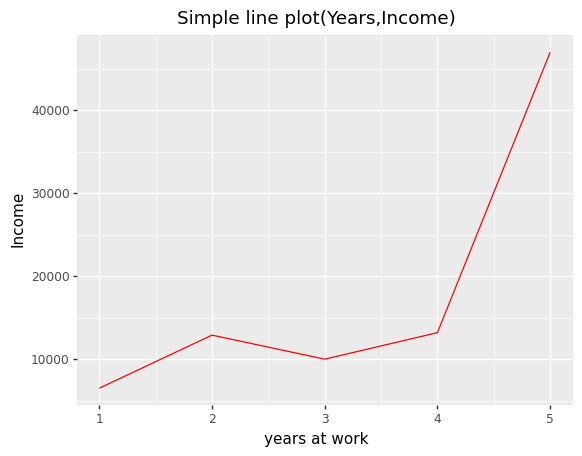

In [32]:
(l_p + plotnine.geom_line(color="red")+plotnine.labs(title = "Simple line plot(Years,Income)")).draw();

In [15]:
# Multiple Plot

work_years = [1,2,3,4]

ml_engineers_income = [10000,12000,14000,16000]
sde_income = [8000,11000,10000,17000]

income_df = pd.DataFrame({"Years at work":work_years,"ML Engineers Income": ml_engineers_income, "SDE Income": sde_income})

In [16]:
income_df.head()

,Years at work,ML Engineers Income,SDE Income
0,1,10000,8000
1,2,12000,11000
2,3,14000,10000
3,4,16000,17000


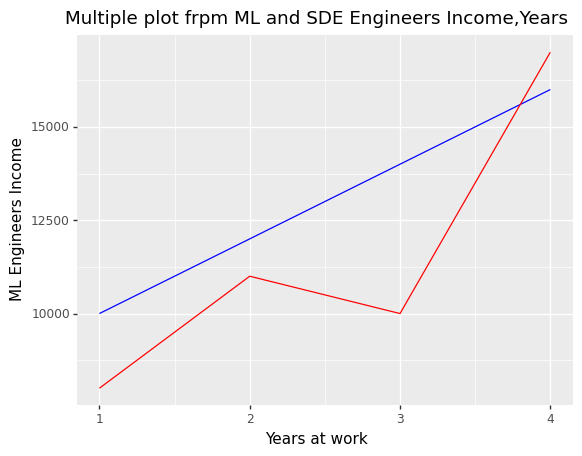

In [17]:
(ggplot()+
 plotnine.geom_line(data=income_df,mapping=aes(x="Years at work", y="ML Engineers Income"),color="blue")+
 plotnine.geom_line(data=income_df,mapping=aes(x="Years at work", y="SDE Income"),color="red")+
 plotnine.labs(title="Multiple plot frpm ML and SDE Engineers Income,Years")+
 plotnine.scale_color_identity(guide=  'legend', name= 'Legend',breaks=["blue","red"],labels=['ML Engineers Income','SDE Income'])).draw();

In [20]:
# Bar Plot

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


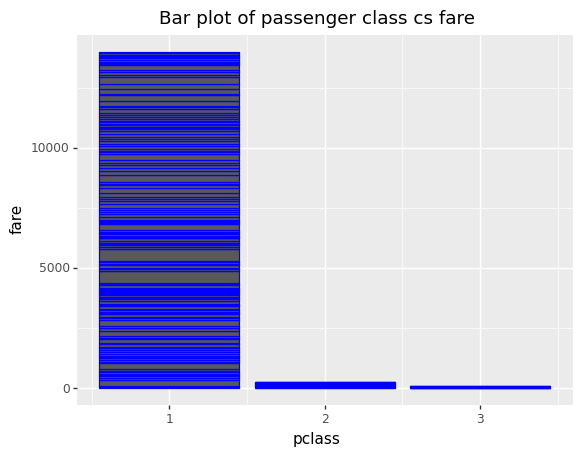

In [36]:
(plotnine.ggplot(data=df.dropna(),mapping = aes(x='pclass',y ='fare',fille='sex'))+
 plotnine.geom_col(color='blue')+
 plotnine.labs(title="Bar plot of passenger class cs fare")).draw();

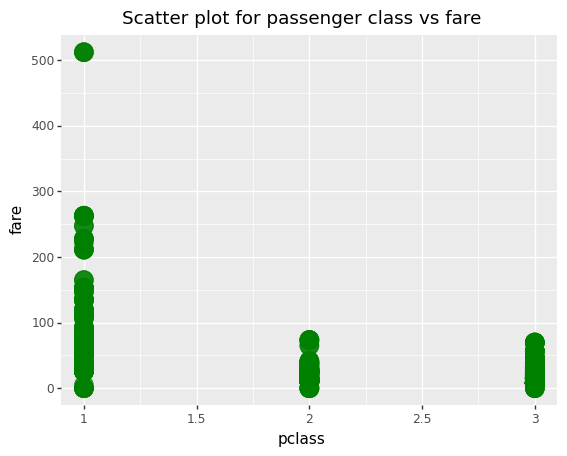

In [23]:
#Scatter Plot

scatter_plot  = ggplot(data = df, mapping=aes(x='pclass',y='fare'))

(scatter_plot +
 plotnine.labs(title='Scatter plot for passenger class vs fare')+
 plotnine.geom_point(shape='o',size=7,color='green',alpha=0.7)).draw();

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


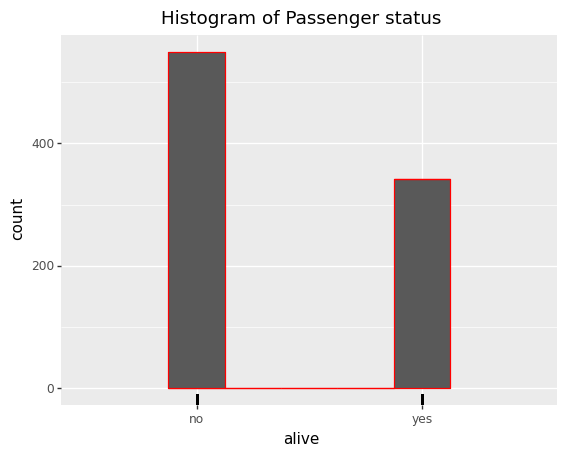

In [39]:
#Histogram

hist = ggplot(data= df, mapping=aes(x='alive'))

(hist +
 plotnine.labs(title='Histogram of Passenger status')+
 plotnine.geom_histogram(color='red')+
 plotnine.geom_rug()).draw();

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


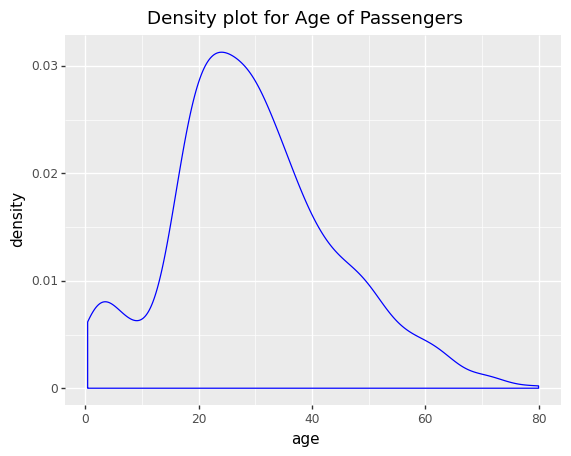

In [40]:
# Density Plot

kde = ggplot(data=df,mapping = aes('age'))

(kde+
 plotnine.geom_density(color='blue')+
 plotnine.labs(title='Density plot for Age of Passengers')).draw();

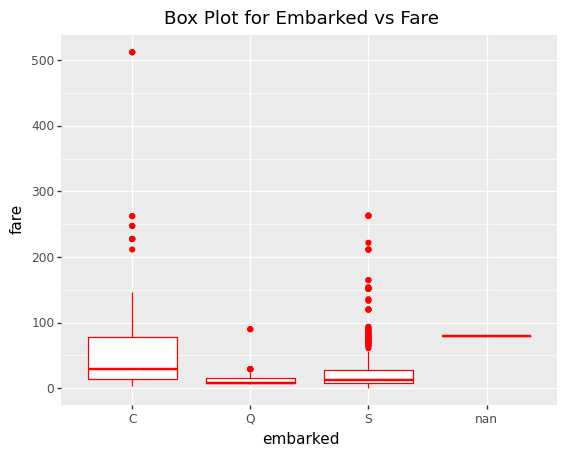

In [41]:
#Box Plot

bp= ggplot(data=df, mapping = aes(x="embarked",y= "fare"))

(bp+
 plotnine.geom_boxplot(color= "red")+
 plotnine.labs(title="Box Plot for Embarked vs Fare")).draw();

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 177 rows containing non-finite values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 177 rows containing missing values.


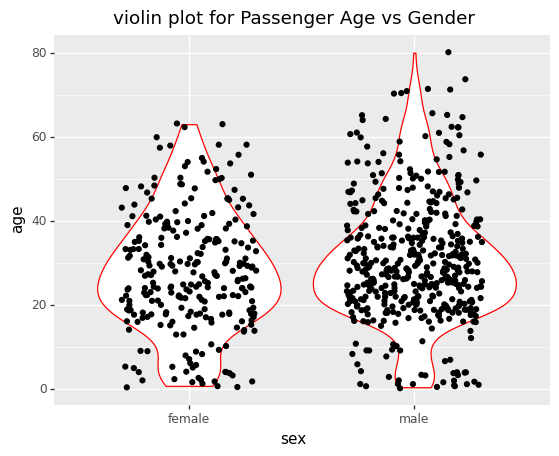

In [43]:
#violin plot

vp= ggplot(data=df, mapping= aes(x="sex",y="age"))

(vp+
 plotnine.geom_violin(color='red')+
 plotnine.labs(title="violin plot for Passenger Age vs Gender")+
 plotnine.geom_jitter(position=plotnine.position_jitter(0.3))).draw();